In [34]:
from matplotlib.image import imread
import matplotlib.pyplot as plt
import numpy as np
import os
plt.rcParams['figure.figsize'] = [16,8]

In [35]:
A = imread('3-1.webp')
X = np.mean(A,-1) # convert RGB to grayscale


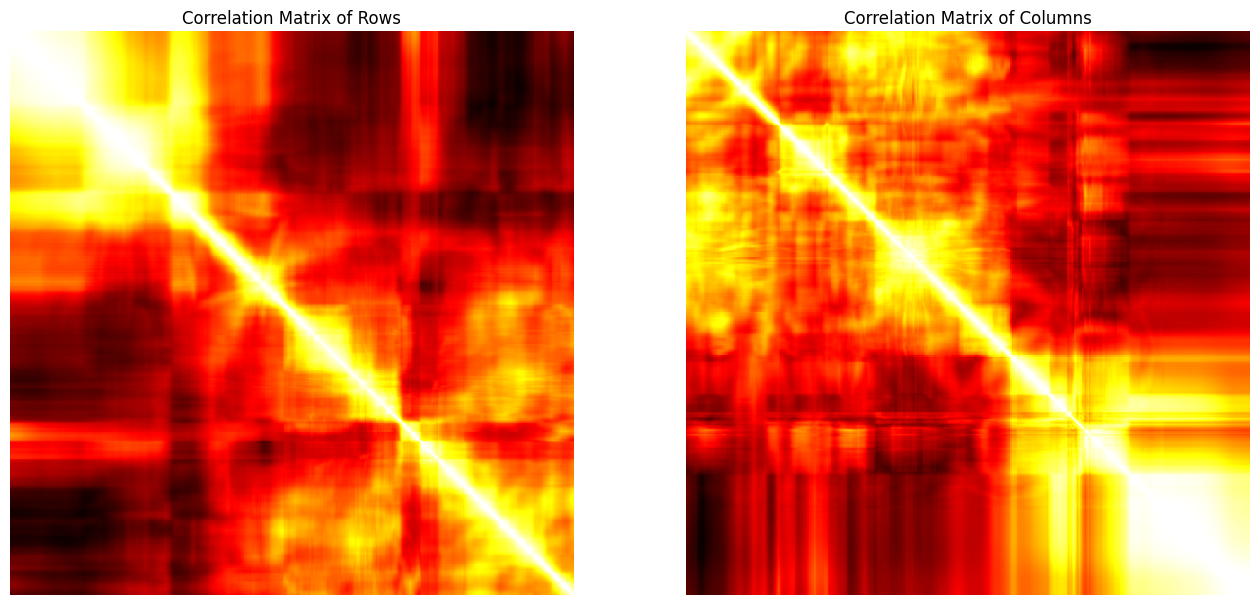

In [36]:
U, S, VT = np.linalg.svd(X,full_matrices=False)

def normalize_matrix(X):
    X_mean = X - np.mean(X, axis=0)
    X_std = X_mean / np.std(X, axis=0)
    return X_std

X_norm_rows = normalize_matrix(X)
X_norm_cols = normalize_matrix(X.T).T

corr_matrix_rows = np.corrcoef(X_norm_rows, rowvar=True)
corr_matrix_cols = np.corrcoef(X_norm_cols, rowvar=False)

U_rows, S_rows, VT_rows = np.linalg.svd(corr_matrix_rows, full_matrices=False)
U_cols, S_cols, VT_cols = np.linalg.svd(corr_matrix_cols, full_matrices=False)

fig, ax = plt.subplots(1, 2, figsize=(16, 8))

ax[0].imshow(corr_matrix_rows, cmap='hot', interpolation='nearest')
ax[0].set_title('Correlation Matrix of Rows')
ax[0].axis('off')

ax[1].imshow(corr_matrix_cols, cmap='hot', interpolation='nearest')
ax[1].set_title('Correlation Matrix of Columns')
ax[1].axis('off')

plt.show()